<a href="https://colab.research.google.com/github/MohamedAbuAmira/ML-DL-Examples/blob/master/pytesseract(OCR).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation


In [9]:
!pip install pytesseract


you will first need to install another package called tesseract-ocr and make a direct cmd connection to the .exe file (all written in the instructions and available on my repo, do not despair).


In [10]:
!sudo apt install tesseract-ocr

Reading package lists... Done
Building dependency tree       
Reading state information... Done
tesseract-ocr is already the newest version (4.00~git2288-10f4998a-2).
The following package was automatically installed and is no longer required:
  libnvidia-common-440
Use 'sudo apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 39 not upgraded.


## Make sure you are installing both libraries together.


In [11]:
try:
 from PIL import Image
except ImportError:
 import Image
import cv2
from google.colab.patches import cv2_imshow
import pytesseract
import matplotlib.pyplot as plt
import numpy as np


## Checking installation folder


Before proceeding, you will need to find out where do you have to find the tesseract execution file.

In [12]:
!which tesseract


/usr/bin/tesseract


You can now copy the output to specify the location of the .exe file. Unfortunately, it appears this is the only workaround to make Tesseract work on Google Colab. So far, this appears to be the only working tutorial between the many I searched.

In [13]:
pytesseract.pytesseract.tesseract_cmd = (
    r'/usr/bin/tesseract'
)

**The library should have been imported correctly.**


# First Try

In [14]:
img_1 = cv2.imread(r'/content/Images/crnn.png')
# By default OpenCV stores images in BGR format and since pytesseract assumes RGB format,
# we need to convert from BGR to RGB format/mode:
#d = cv2.cvtColor(img_1, cv2.COLOR_BGR2RGB)

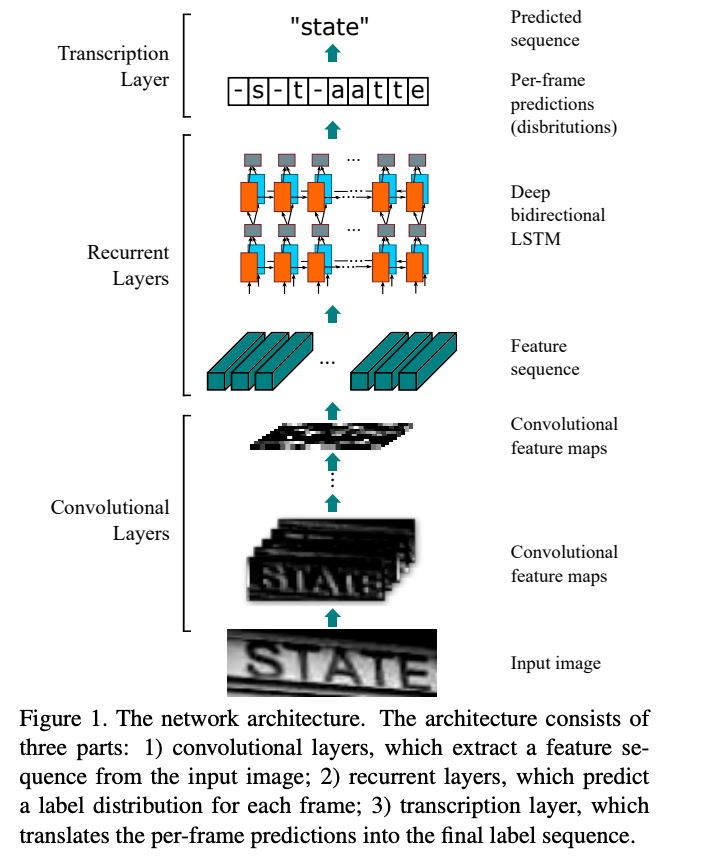

In [15]:
# Show the image
Image.open('/content/Images/crnn.png')

In [16]:
custom_config = r'--oem 3 --psm 6'
print(pytesseract.image_to_string(img_1, lang='eng',config=custom_config))

"state" ieee
Transcription t a
tayer Predict
Els|-[tl-falaltltle| predictions
t (disbritutions)
_... Deep
bidirectional
~ LSTM
Recurrent _...
Layers
t
Feature
7 sequence
ae Convolutional
feature maps
t ips
Convolutional t
Layers
Convolutional
feature maps
t
‘STATE snpmess
Figure 1. The network architecture. The architecture consists of
three parts: 1) convolutional layers, which extract a feature se-
quence from the input image; 2) recurrent layers, which predict
a label distribution for each frame; 3) transcription layer, which
translates the per-frame predictions into the final label sequence.



# Preprocessing for Tesseract


* To avoid all the ways your tesseract output accuracy can drop, you need to make sure the image is appropriately pre-processed.

* This includes rescaling, binarization, noise removal, deskewing, etc.

* To preprocess image for OCR, use any of the following python functions 


In [17]:
# get grayscale image
def get_grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# noise removal
def remove_noise(image):
    return cv2.medianBlur(image,5)
 
#thresholding
def thresholding(image):
    return cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

#dilation
def dilate(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.dilate(image, kernel, iterations = 1)
    
#erosion
def erode(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.erode(image, kernel, iterations = 1)

#opening - erosion followed by dilation
def opening(image):
    kernel = np.ones((5,5),np.uint8)
    return cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

#canny edge detection
def canny(image):
    return cv2.Canny(image, 100, 200)

#skew correction
def deskew(image):
    coords = np.column_stack(np.where(image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
    return rotated

#template matching
def match_template(image, template):
    return cv2.matchTemplate(image, template, cv2.TM_CCOEFF_NORMED) 

After preprocessing with the following code

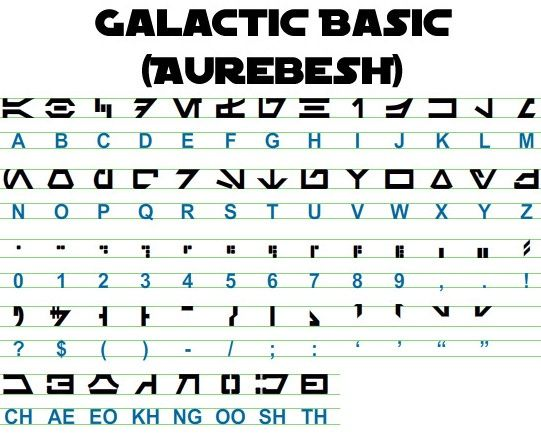

In [18]:
image_2 = cv2.imread('/content/Images/aurebesh.jpg')
cv2_imshow(image_2)

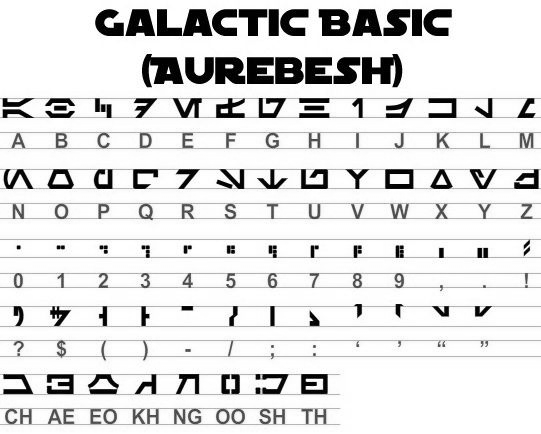

GALACTIC BASIC
(AUREBESH)
REehHTFVMVEVEITZIoIN EL
A 2S > EE eS A ek oe
AOder7NVYoYoAVaA
NOP RS Tn wee
‘ss 4 oe 8 g Pf fF f 4 mw 4
Sea
7 77 Ty
2S ys ee
ASaSAnNADI
CH AE EO KH NG OO SH TH



In [19]:
gray = get_grayscale(image_2)
cv2_imshow(gray)
print(pytesseract.image_to_string(gray, lang='eng',config=custom_config))

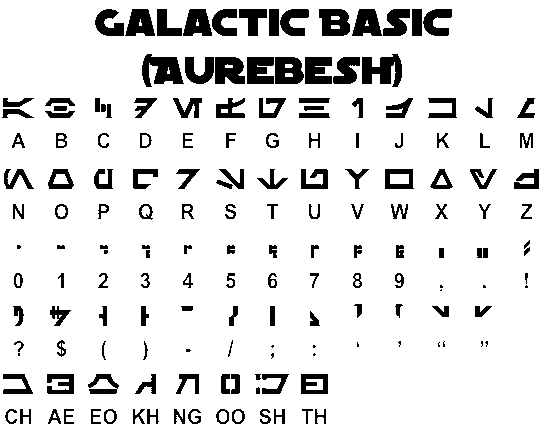

GALACTIC BASIC
(AVREBESH)
RS 7FVMeEVEi1i fol Z
A B C DE F GH IJ K LM
AOdCeUT7TNVTOoOYOAVA
N OO P Q@R S$ TU VW XK Y¥ Z
"os 3 3 rm 8 fo Pf F Bo a om #
0 12 3 4 5 6 7 8 9 , . !
i A rd re
2 S$ ( Foe Fo gor ht roe
AadSANDIe
CH AE EO KH NG OO SH TH



In [20]:
thresh = thresholding(gray)
cv2_imshow(thresh)
print(pytesseract.image_to_string(thresh, lang='eng',config=custom_config))

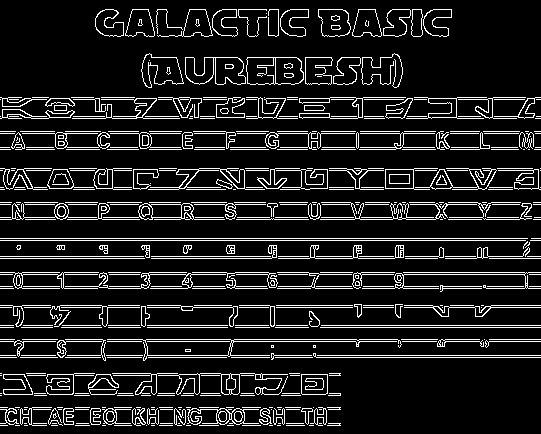

CAA Cnr ASG
(KUREBESE?
SA
a SS
{o_o RS a
a
a a A : rc
| A |
a
eA Ao
erm emc om Cm cuOcmc (mim



In [21]:
canny_ = canny(gray)
cv2_imshow(canny_)
print(pytesseract.image_to_string(canny_, lang='eng',config=custom_config))

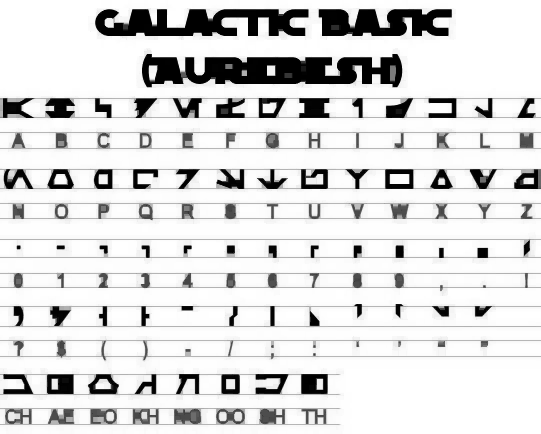

GALACTIC BASIC
(AUREZBEILSH)
KEE VTMEUEiwoayvs
A BC D FE F @ H [| J K CL
AOadr7WTt HYOAYV 4
WO P Q R 8S T U VW WK y Z
‘5 a aor es ln lp le ce
1 2 a a4 8 8 7 Sb Ps,
VY itr-~ -yrp»pTttYY
2 ty ee eg Ee Se
AGoOAnNnoOIH
CH AE BO KH @@ OO BH TH



In [22]:
opening_ = opening(gray)
cv2_imshow(opening_)

print(pytesseract.image_to_string(opening_,config=custom_config))

**We see that opening is good**

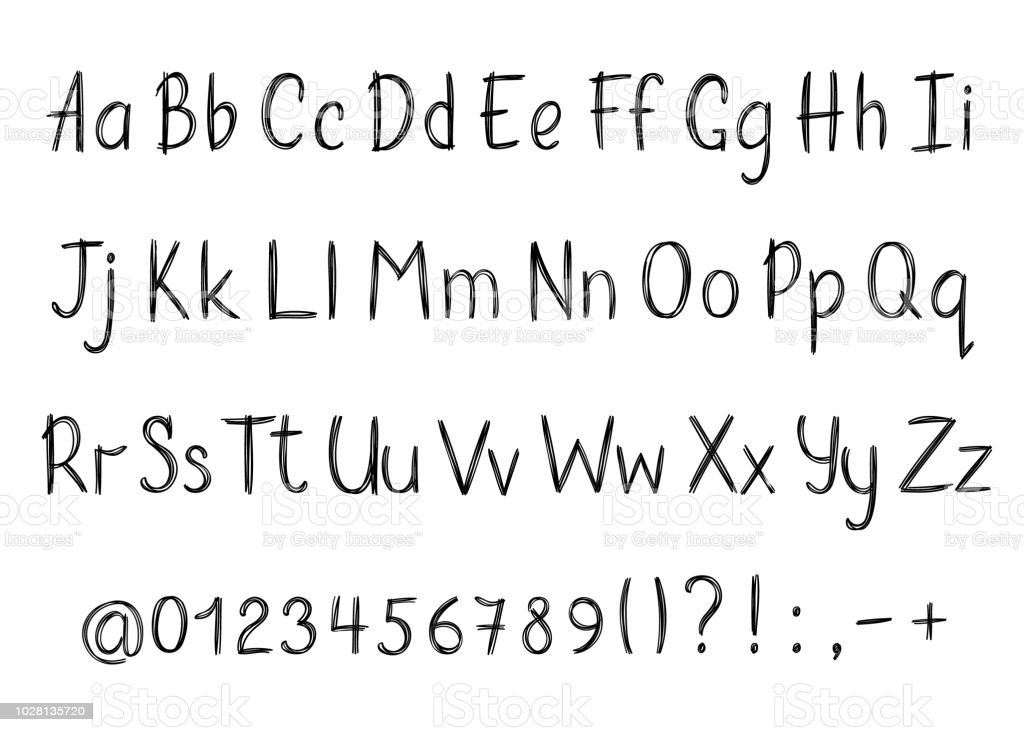

In [23]:
# Try another pic

img_3 = cv2.imread('/content/Images/istockphoto-1028135720-1024x1024.jpg')
cv2_imshow(img_3)

In [24]:
print(pytesseract.image_to_string(img_3, config=custom_config))

fa Bb Cc Dd Ee Ff Gg Hh Ti
Jj Kk LIMm Nn Oo Pp Qq

Rr Ss TC Uu W Ww Xx Yy Zz
@0123456789()?!:,-+



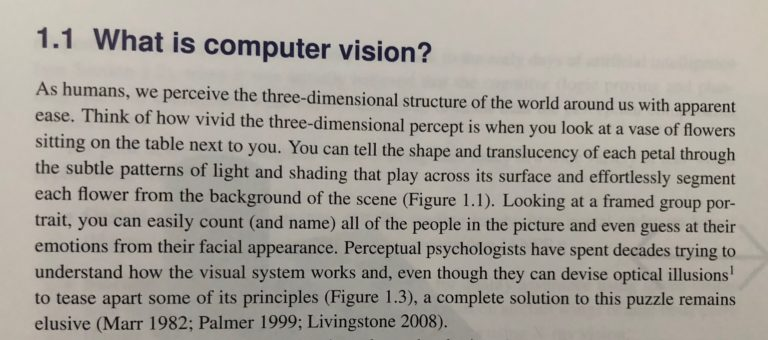

1.1 What is computer vision?

As humans, we perceive the three-dimensional structure of the world around us with apparent
ease, Think of how vivid the three-dimensional percept is when you look at a vase of flowers
sitting on the table next to you. You can tell the shape and translucency of each petal through
the subtle patterns of light and shading that play across its surface and effortlessly segment
each flower from the background of the scene (Figure 1.1). Looking at a framed group por-
trait, you can easily count (and name) all of the people in the Picture and even guess at their
emotions from their facial appearance. Perceptual psychologists have spent decades trying to
understand how the visual system works and, even though they can devise optical illusions!
to tease apart some of its principles (Figure 1.3), a complete solution to this puzzle remains
elusive (Marr 1982; Palmer 1999; Livingstone 2008).



In [25]:
img_4 = cv2.imread('/content/Images/CV.jpg')
cv2_imshow(img_4)
print(pytesseract.image_to_string(img_4, config=custom_config))

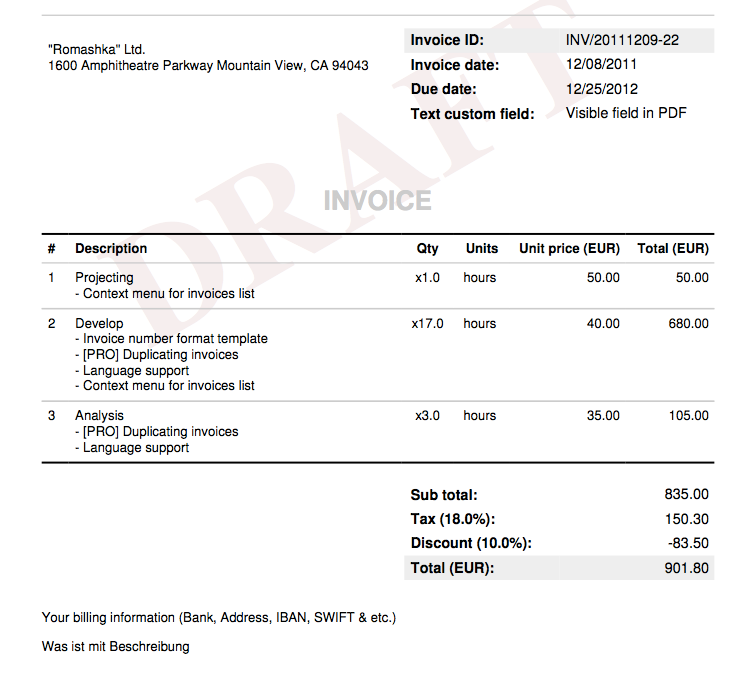

Invoice ID: INV/20111209-22
"Romashka" Ltd.
1600 Amphitheatre Parkway Mountain View, CA 94043 —Invoice date: 12/08/2011
Due date: 12/25/2012
Text custom field: Visible field in PDF
# Description Qty Units Unit price (EUR) Total (EUR)
1 Projecting x1.0 hours 50.00 50.00
~ Context menu for invoices list
2 Develop x17.0 hours 40.00 680.00
- Invoice number format template
= [PRO] Duplicating invoices
- Language support
~ Context menu for invoices list
3 Analysis x30 hours 35.00 105.00
= [PRO] Duplicating invoices
- Language support
Sub total: 835.00
Tax (18.0%): 150.30
Discount (10.0%): -83.50
Total (EUR): 901.80
Your billing information (Bank, Address, IBAN, SWIFT & etc.)
Was ist mit Beschreibung



In [26]:
img_5 = cv2.imread('/content/Images/blank header.png')
cv2_imshow(img_5)
print(pytesseract.image_to_string(img_5, config=custom_config))

# Getting boxes around text


In [27]:
img_5 = cv2.imread('/content/Images/blank header.png')

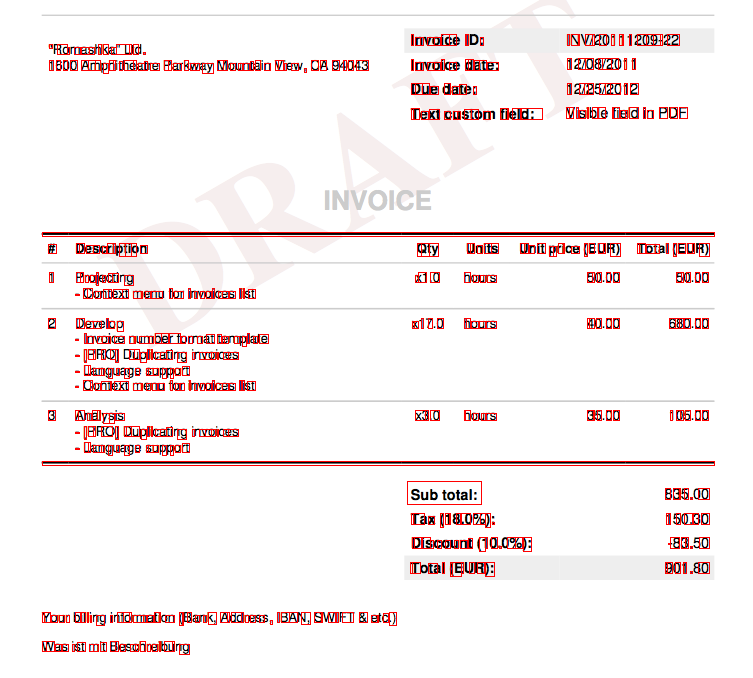

-1

In [28]:
h, w, c = img_5.shape
boxes = pytesseract.image_to_boxes(img_5) 
for b in boxes.splitlines():
    b = b.split(' ')
    img_5 = cv2.rectangle(img_5, (int(b[1]), h - int(b[2])), (int(b[3]), h - int(b[4])), (0, 0, 255), 1)

cv2_imshow(img_5)
cv2.waitKey(0)

In [29]:
boxes.splitlines()[:10]  #Invoice ID:

['I 411 633 413 644 0',
 'n 415 633 420 641 0',
 'v 420 633 423 641 0',
 'o 427 633 434 641 0',
 'i 434 633 440 641 0',
 'c 441 633 449 644 0',
 'e 449 633 456 644 0',
 'I 465 633 466 644 0',
 'D 466 633 468 644 0',
 ': 480 633 483 641 0']

In [30]:
from pytesseract import Output
img_5 = cv2.imread('/content/Images/blank header.png')
d = pytesseract.image_to_data(img_5, output_type=Output.DICT)
print(d.keys())

dict_keys(['level', 'page_num', 'block_num', 'par_num', 'line_num', 'word_num', 'left', 'top', 'width', 'height', 'conf', 'text'])


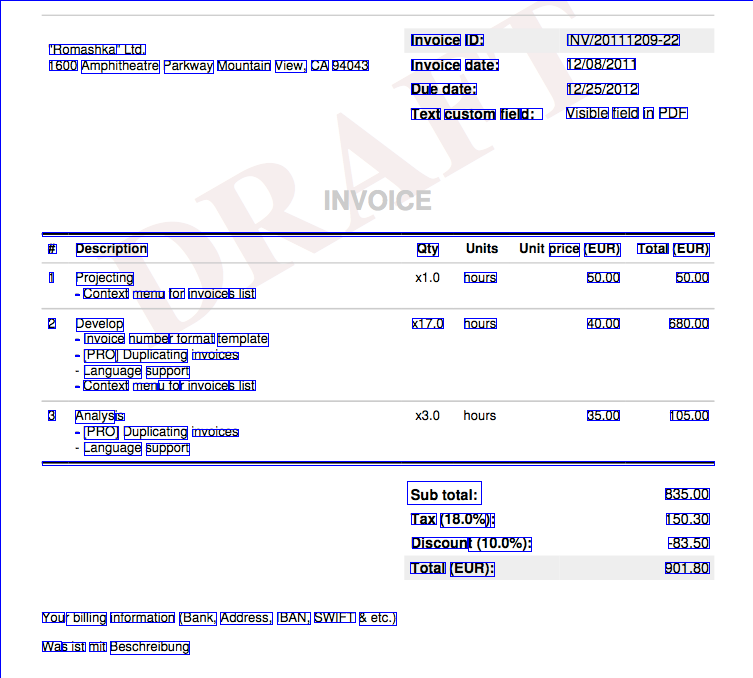

-1

In [31]:
n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 40:
        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
        img_5 = cv2.rectangle(img_5, (x, y), (x + w, y + h), (255, 0, 0), 1)

cv2_imshow(img_5)
cv2.waitKey(0)

# Text template matching


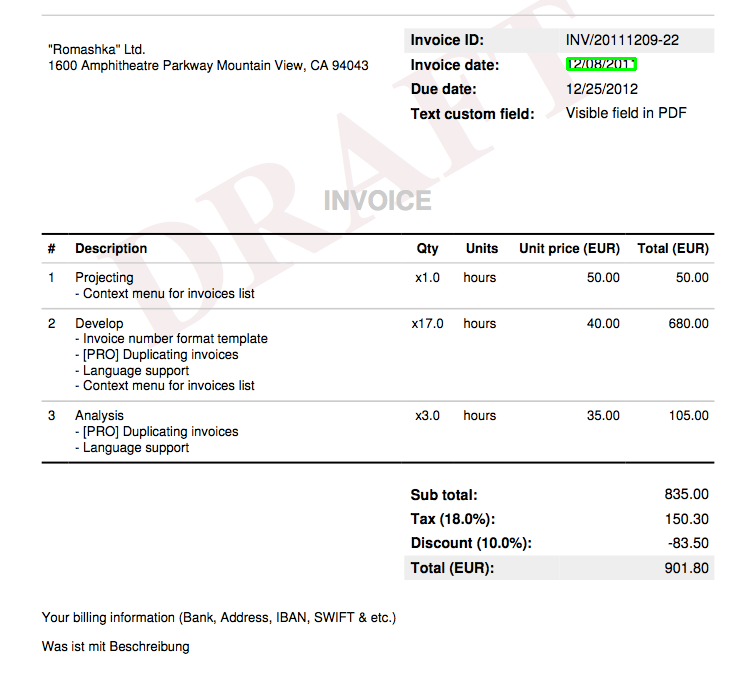

-1

In [33]:
import re

img_5 = cv2.imread('/content/Images/blank header.png')
d = pytesseract.image_to_data(img_5, output_type=Output.DICT)
keys = list(d.keys())

date_pattern = '^(0[1-9]|[12][0-9]|3[01])/(0[1-9]|1[012])/(19|20)\d\d$'

n_boxes = len(d['text'])
for i in range(n_boxes):
    if int(d['conf'][i]) > 60:
    	if re.match(date_pattern, d['text'][i]):
	        (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])
	        img_5 = cv2.rectangle(img_5, (x, y), (x + w, y + h), (0, 255, 0), 2)

cv2_imshow(img_5)
cv2.waitKey(0)

# Page segmentation modes


detect the orientation of text in a image and also the script in which it is written

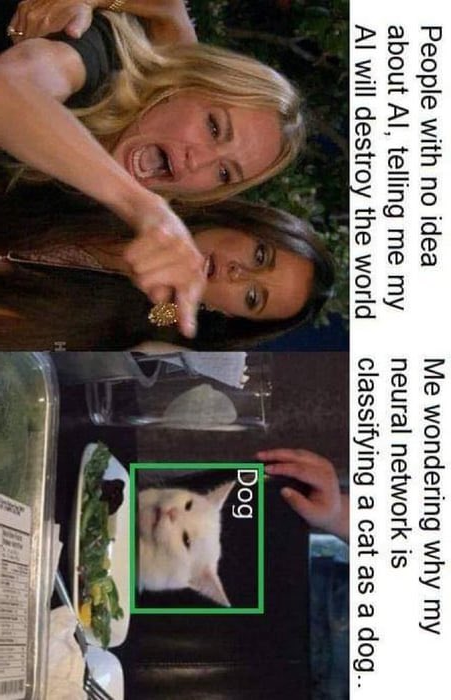

In [34]:
img_6 = cv2.imread('/content/Images/EdgXLKrXgAIcHFG.jpg')
cv2_imshow(img_6)

In [39]:
# Detect orientation and script
osd = pytesseract.image_to_osd(img_6)
angle = re.search('(?<=Rotate: )\d+', osd).group(0)
print("angle: ", angle)

angle:  270


In [40]:
osd.splitlines()

['Page number: 0',
 'Orientation in degrees: 90',
 'Rotate: 270',
 'Orientation confidence: 3.27',
 'Script: Latin',
 'Script confidence: 3.70']

# Detect only digits


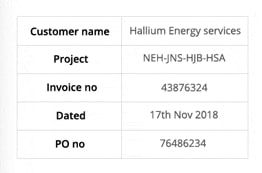

In [47]:
img_7 = cv2.imread('/content/Images/image2.jpg')
cv2_imshow(img_7)

In [48]:
# The text extracted from this image looks like this.

print(pytesseract.image_to_string(img_7, config=custom_config))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234



In [49]:
# You can recognise only digits by changing the config to the following

custom_config_ = r'--oem 3 --psm 6 outputbase digits'
print(pytesseract.image_to_string(img_7, config=custom_config_))

‘Customer name Halim Energy services
Project NEHINS-HIB-HSA
lavoice no 43876324
Dated 17th Nov2018.
POno 176496234

